In [ ]:
import pandas as pd
import numpy as np 

In [ ]:
#criando as listas com os valores Tempo e Nucleos Decaidos
tempo = int(input("Digite o tempo total: "))
tempo = range(tempo)
nucleos = float(input("Digite o numero de nucleos: "))
alpha = float(input("Digite o coef. nuclear: "))

dados = []
dados.append([0, nucleos])

#for que vai criar os nucleos decaidos pelo tempo
for i in tempo:

  nucleos = nucleos * ( 1 - alpha)
  dados.append([(i+1), nucleos])


#criando um dataframe a partir dos dados coletados
dataset = pd.DataFrame(dados)

#renomeando as colunas do dataframe
dataset_novo = dataset.rename(columns = {0 : 'Tempo', 1 : 'Nucleos'}, inplace = False)

#criando a coluna ln(Nucleos) -> vai ser a escala logritimica
dataset_novo['ln(Nucleos)'] = np.log(dataset_novo['Nucleos'])


Digite o tempo total: 1000
Digite o numero de nucleos: 1000
Digite o coef. nuclear: 0.00924


In [ ]:
dataset_novo

,Tempo,Nucleos,ln(Nucleos)
0,0,1000.000000,6.907755
1,1,990.760000,6.898472
2,2,981.605378,6.889189
3,3,972.535344,6.879906
4,4,963.549117,6.870623
...,...,...,...
996,996,0.096514,-2.338067
997,997,0.095622,-2.347349
998,998,0.094739,-2.356632
999,999,0.093863,-2.365915


Text(0.5, 1.0, 'Tempo x Nº de Núcleos')

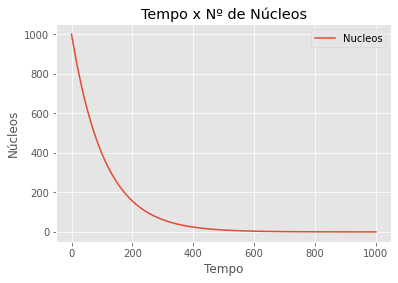

In [ ]:
#importante a biblioteca para plotar os graficos nucleos x tempo e ln(nucleos) x tempo
import matplotlib.pyplot as plt 

dataset_novo.plot("Tempo", "Nucleos")
plt.style.use('ggplot')
plt.xlabel('Tempo')
plt.ylabel('Núcleos')
plt.title('Tempo x Nº de Núcleos')

Text(0.5, 1.0, 'Tempo x Ln(Nº de Núcleos)')

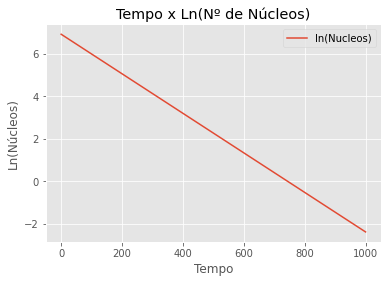

In [ ]:
#importante a biblioteca para plotar os graficos nucleos x tempo e ln(nucleos) x tempo
import matplotlib.pyplot as plt

dataset_novo.plot("Tempo", "ln(Nucleos)")
plt.style.use('ggplot')
plt.xlabel('Tempo')
plt.ylabel('Ln(Núcleos)')
plt.title('Tempo x Ln(Nº de Núcleos)')

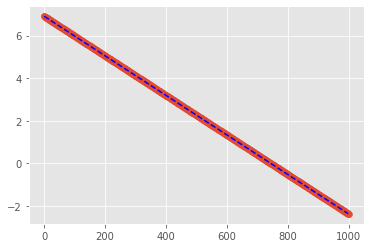

y = -0.00928 * x + 6.90776
O coef. encontrado é 0.00928


In [ ]:

#importanto biblioteca para curvefit
from numpy import sin
from numpy import sqrt
from numpy import arange
from pandas import read_csv
from scipy.optimize import curve_fit
from matplotlib import pyplot


#função para deteminar o a regressão linear dos dados ln(nucleos) x tempo
def objective(x, a, b):
	return a * x + b


# choose the input and output variables
x= dataset_novo['Tempo']
y= dataset_novo['ln(Nucleos)']

# curve fit
popt, _ = curve_fit(objective, x, y)

# summarize the parameter values
a, b = popt

# plot input vs output
pyplot.scatter(x, y)

# define a sequence of inputs between the smallest and largest known inputs
x_line = arange(min(x), max(x), 1)

# calculate the output for the range
y_line = objective(x_line, a, b)

# create a line plot for the mapping function
pyplot.plot(x_line, y_line, '--', color='blue')
pyplot.show()

print('y = %.5f * x + %.5f' % (a, b))
print('O coef. encontrado é %.5f' % (-a))